# <b><u> Project Title : Online Retail Customer Segmentation on Tansnational Tataset. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#Importing Libraries

In [ ]:
#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Supress future warnings
import warnings
warnings.filterwarnings('ignore')

#Reading the Dataset

In [ ]:
#Define url for stored dataset
url = 'https://drive.google.com/uc?export=download&id=1rTzA2bJ6nZqjiHjuQ6lV4Y4ko2BAvXla'

#Read the csv file into pandas dataframe
data = pd.read_excel(url)

###Observing raw data visually 

In [ ]:
#Getting the first 5 observations
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Getting the last 5 observations
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


###Getting the shape of dataset

In [ ]:
data.shape

(541909, 8)

###Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


###Descriptive Statistics

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


###Checking for Missing Observations

In [ ]:
#Checking for the count of missing values 
print('Missing value count with respect to each column:')
data.isna().sum()

Missing value count with respect to each column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

'CustomerID' column seems to contain a lot of missing values. Let's check how much of these constitute in our data, in percentage.

In [ ]:
#Checking percentage missing values in our data.
print(round(data[['CustomerID', 'Description']].isnull().sum()/len(data)*100,2))

CustomerID     24.93
Description     0.27
dtype: float64


###Checking for Duplicate Observations

In [ ]:
#Checking for the count of duplicate values 
print('Duplicate value count:')
len(data[data.duplicated()])

Duplicate value count:


5268

###**Observations**

* Our original Dataset contains 541909 rows and 8 columns.
* There are 3 numerical, 1 Date-Time and 4 catagorical features present in our dataset.
* Almost 25% values in 'CustomerID' feature of our original dataset contains missing values.
* There are 5268 duplicate observations present in our data.

#Data Cleaning

###Missing value treatment

* The observations suggest that about 25% of data does not have a CustomerID.
* Which means these purchases haven't been assigned to any customer.
* We must remove these observations as these do not help us in forming clusters, as these can't be related to a CustomerID.
* We can also remove missing values from the 'Description' feature.

In [ ]:
#Dropping null values
data.dropna(inplace=True)

In [ ]:
#Dataset shape after removing null values
data.shape

(406829, 8)

###Duplicate value treatment

* We can simply drop the duplicate values as these are very low in number.

In [ ]:
#Dropping duplicate observations
data.drop_duplicates(inplace=True)

In [ ]:
#Dataset shape after removing duplicate values
data.shape

(401604, 8)

###Cleaning some more

* As given in the data dictionary, some values in 'InvoiceNo' column contain observations beginning with 'c'


* "If this code (InvoiceNo) starts with letter 'c', it indicates a cancellation"
* We will drop these rows.

In [ ]:
#Converting 'InvoiceNo' to string
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [ ]:
#Viewing these observations
data[data['InvoiceNo'].str.contains('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
#Removing observations with InvoiceNo beginning with 'c'
data = data[~data['InvoiceNo'].str.contains('C')]

In [ ]:
#Dataset shape after removing observations with InvoiceNo beginning with 'c'
data.shape

(392732, 8)

In [ ]:
#Dataset information after data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


###**Observations**

* Our dataset no more contains any missing or duplicate values.
* We are left with 392732 rows after cleaning the data.

#Feature Engineering

##Date-Time features
* Our dataset contains 'InvoiceDate' feature which gives us the date and time of the transactions.
* We can extract saperate features for each year, month, day, etc.

In [ ]:
#Converting 'InvoiceDate' to date-time format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
#Extracting the Year
data["Year"] = data["InvoiceDate"].apply(lambda x: x.year)

#Extracting the Month Name
data['Month'] = data["InvoiceDate"].apply(lambda x: x.month_name())

#Extracting the Month Number
data['MonthNum'] = data["InvoiceDate"].apply(lambda x: x.month)

#Extracting the Day Name
data['Day'] = data["InvoiceDate"].apply(lambda x: x.day_name())

#Extracting the Day Number
data["DayNum"] = data["InvoiceDate"].apply(lambda x: x.day)

#Extracting the Hour
data["Hour"] = data["InvoiceDate"].apply(lambda x: x.hour)

#Extracting the Minute
data["Minute"] = data["InvoiceDate"].apply(lambda x: x.minute)

##TotalAmount
* 'Quantity' feature gives us the quantity of product in one transaction
* 'UnitPrice' feature gives us the price of product per unit
* We can multiply these values to get the total amount per transaction

In [ ]:
#Extracting 'TotalAmount' feature from 'Quantity' and 'UnitPrice'
data['TotalAmount']=data['Quantity']*data['UnitPrice']

##DayPart
* Now that we have extracted time features(Hour, Minute) we can divide these times of the day to get a catagorical feature called 'DayPart'.
* 'DayPart' gives us the part of the day(Morning, Afternoon, Evening) based on the hour of that day.

In [ ]:
#Extracting 'DayPart' from 'Hour' feature
data['DayPart'] = data["Hour"].apply(
                                      lambda x : 'Morning' if 6<=x<=11 else ('Afternoon' if 12<=x<=17 else 'Evening')
                                  )

In [ ]:
#Data overview after feature engineering
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthNum,Day,DayNum,Hour,Minute,TotalAmount,DayPart
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,20.34,Morning


In [ ]:
#Shape of the data after feature engineering
data.shape

(392732, 17)

###**Observations**

* We have constructed 9 new features out of which 7 give us the information about the date and time saperately

#Exploratory Data Analysis

##Distribution of Numeric Features

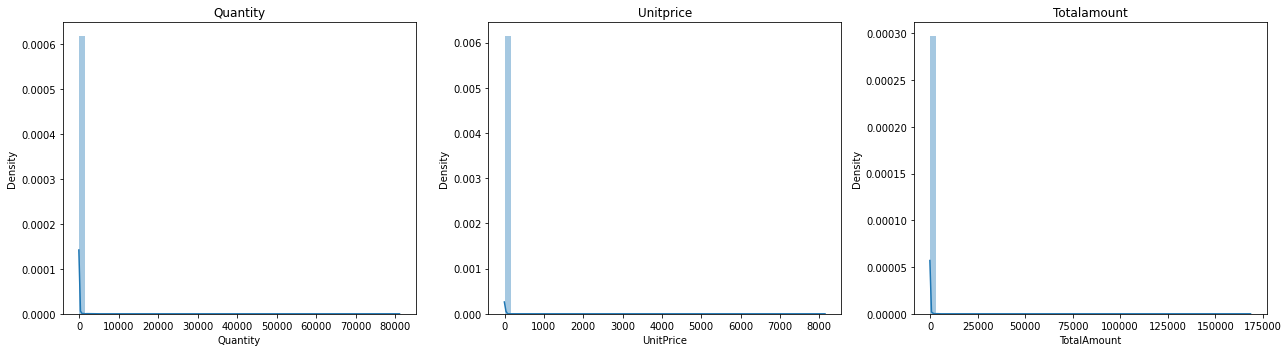

In [ ]:
#Columns to analyse distribution
cols = ['Quantity','UnitPrice','TotalAmount']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(data[col])
  plt.title(col.title())
  plt.tight_layout()

* We can see that the 'Quantity', 'UnitPrice', 'TotalAmount' are all positively skewed.(mean > median > mode)
* Ideally we these features must be symmetric.(mean = median = mode)
* For this we must apply some kind of transformation to make these distributions close symmetric.
* Here, we will encorporate logarithmic transformation.

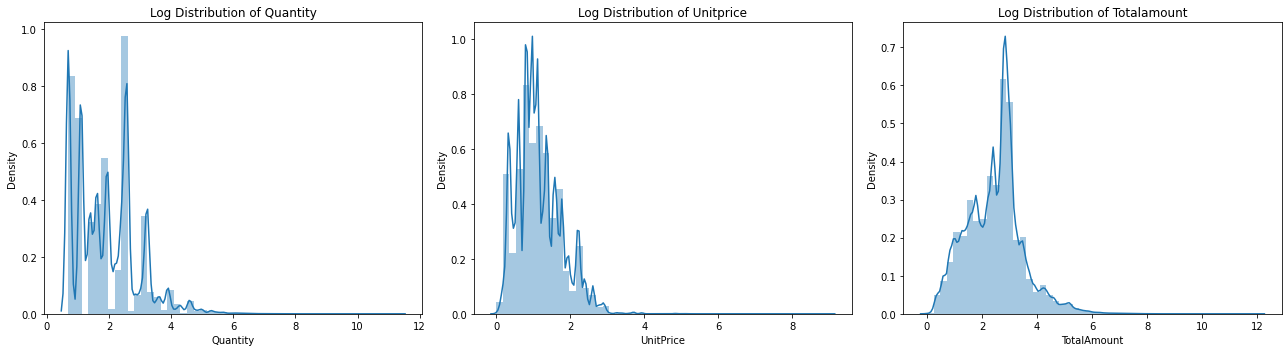

In [ ]:
#Columns to analyse distribution
cols = ['Quantity','UnitPrice','TotalAmount']

#Plotting the distribution of log transformed features 
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(np.log1p(data[col]))
  plt.title(f'Log Distribution of {col.title()}')
  plt.tight_layout()

##Exploring the 'Description' column